In [1]:
#import tdt
import matplotlib.pyplot as plt
import trompy as tp
import numpy as np
import pickle
import pandas as pd
%matplotlib inline

In [2]:
with open('C://Data//hislight_pickles//adlib_light.pickle', 'rb') as handle:
    adlib_light = pickle.load(handle)

In [3]:
with open('C://Data//hislight_pickles//restricted_dark.pickle', 'rb') as handle:
    restricted_dark = pickle.load(handle)

In [4]:
with open('C://Data//hislight_pickles//adlib_dark.pickle', 'rb') as handle:
    adlib_dark = pickle.load(handle)

In [5]:
with open('C://Data//hislight_pickles//adlib_sucralose.pickle', 'rb') as handle:
    adlib_sucralose = pickle.load(handle)

In [6]:
def get_mice(data):
    mice = []
    for key, val in data.items():
        if val["mouse_ID"] not in mice:
            mice.append(val["mouse_ID"])
    return mice

In [7]:
def get_lick_data (data, mice):
    
    licks = [] #empty list where data from all mice will be stored
    burst_number = []
    burst_size = []
    burst_size_first_3 = []
    
    for mouse in mice:
        temp_total = []
        temp_lick = []
        temp_burstnum = []
        temp_burstsize = []
        temp_burstsize_first_3 = []
        
        for key, val in data.items():
            if val["mouse_ID"] == mouse:
                if len(val["licks"]) < 3:
                    continue
                onset= val["licks"]
                #print(onset)
                lickdata = tp.lickCalc(onset, minburstlength=3)
                temp_total.append(lickdata["total"])
                temp_lick.append(lickdata["licks"])
                temp_burstnum.append(lickdata["bNum"])
                temp_burstsize.append(lickdata["bMean"])
                temp_burstsize_first_3.append(lickdata["bMean-first3"])

        licks.append(np.mean(temp_total))
        burst_number.append(np.mean(temp_burstnum))
        burst_size.append(np.mean(temp_burstsize))
        burst_size_first_3.append(np.mean(temp_burstsize_first_3))
        
    data_to_return= {"licks":licks, "burst number": burst_number, "burst size": burst_size, "burst size first 3": burst_size_first_3}
        
    return data_to_return

In [8]:
mice= get_mice(adlib_light)
print(mice)

['HL202', 'HL203', 'HL204', 'HL205', 'HL206', 'HL207', 'HL208', 'HL209', 'HL210', 'HL211', 'HL212']


In [9]:
adlib_light_means= get_lick_data(adlib_light, mice)
adlib_dark_means= get_lick_data(adlib_dark, mice)
adlib_sucralose_means= get_lick_data(adlib_sucralose, mice)
restricted_dark_means= get_lick_data(restricted_dark, mice)

C:\Users\kvo019\Anaconda3\lib\site-packages\trompy\lickcalc.py:239: RuntimeWarning: invalid value encountered in power
  return (np.exp(-(alpha*x)**beta))


In [10]:
colors = ["#D83F31", "#EE9322", "#219C90","#E9B824"]

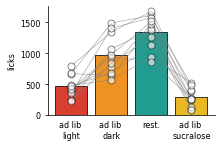

In [11]:
# MEAN LICKS PER SESSION

f,ax=plt.subplots(figsize=(3,2), ncols=1)

tp.barscatter([adlib_light_means["licks"], adlib_dark_means["licks"], restricted_dark_means["licks"], adlib_sucralose_means["licks"]],
              paired=True,
              barfacecolor_option='individual',
              barfacecolor=colors,
              scattersize=70,
              grouplabel= ["ad lib \nlight", "ad lib \ndark", "rest.", "ad lib \nsucralose"],
              scatteralpha=0.6,
              fontsize=8,
              ax=ax)

ax.set_ylabel("licks", fontsize = 8)

for tick in ax.yaxis.get_majorticklabels():
    tick.set_fontsize(8) 

f.savefig("C:\\Users\\kvo019\\OneDrive - UiT Office 365\\Pipette 2\\People\\Linnea\\Manuscripts\\hislight paper\\figures\\licks_per_session.pdf")


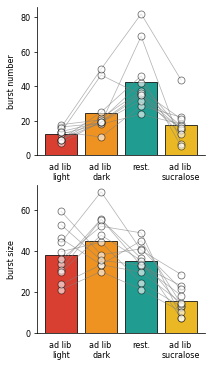

In [12]:
f,ax=plt.subplots(figsize=(3, 6), nrows=2, gridspec_kw={"hspace": 0.2})


tp.barscatter([adlib_light_means["burst number"], adlib_dark_means["burst number"], 
               restricted_dark_means["burst number"], adlib_sucralose_means["burst number"]],
              paired=True,
              barfacecolor_option='individual',
              barfacecolor=colors,
              scattersize=70,
              grouplabel= ["ad lib \nlight", "ad lib \ndark", "rest.", "ad lib \nsucralose"],
              scatteralpha=0.6,
              fontsize=8,
              ax=ax[0])

tp.barscatter([adlib_light_means["burst size"], adlib_dark_means["burst size"], 
               restricted_dark_means["burst size"], adlib_sucralose_means["burst size"]],
              paired=True,
              barfacecolor_option='individual',
              barfacecolor=colors,
              scattersize=70,
              grouplabel= ["ad lib \nlight", "ad lib \ndark", "rest.", "ad lib \nsucralose"],
              scatteralpha=0.6,
              fontsize=8,
              ax=ax[1])

ax[0].set_ylabel("burst number", fontsize = 8)
ax[1].set_ylabel("burst size", fontsize = 8)

for tick in ax[0].yaxis.get_majorticklabels():
    tick.set_fontsize(8) 
for tick in ax[1].yaxis.get_majorticklabels():
    tick.set_fontsize(8) 
    
f.savefig("C:\\Users\\kvo019\\OneDrive - UiT Office 365\\Pipette 2\\People\\Linnea\\Manuscripts\\hislight paper\\figures\\microstructure.pdf")

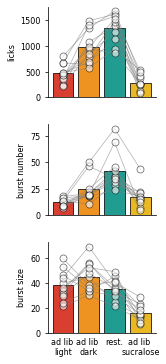

In [13]:
# licks, burst number, burst size

f,ax=plt.subplots(figsize=(2.5, 6), nrows=3, sharex= True, gridspec_kw={"hspace": 0.3, "left":0.3})
plt.subplots_adjust(wspace=0.3)


tp.barscatter([adlib_light_means["licks"], adlib_dark_means["licks"], restricted_dark_means["licks"], adlib_sucralose_means["licks"]],
              paired=True,
              barfacecolor_option='individual',
              barfacecolor=colors,
              scattersize=70,
              #grouplabel= ["ad lib \nlight", "ad lib \ndark", "rest.", "ad lib \nsucralose"],
              scatteralpha=0.6,
              fontsize=8,
              ax=ax[0])

tp.barscatter([adlib_light_means["burst number"], adlib_dark_means["burst number"], 
               restricted_dark_means["burst number"], adlib_sucralose_means["burst number"]],
              paired=True,
              barfacecolor_option='individual',
              barfacecolor=colors,
              scattersize=70,
              #grouplabel= ["ad lib \nlight", "ad lib \ndark", "rest.", "ad lib \nsucralose"],
              scatteralpha=0.6,
              fontsize=8,
              ax=ax[1])

tp.barscatter([adlib_light_means["burst size"], adlib_dark_means["burst size"], 
               restricted_dark_means["burst size"], adlib_sucralose_means["burst size"]],
              paired=True,
              barfacecolor_option='individual',
              barfacecolor=colors,
              scattersize=70,
              grouplabel= ["ad lib \nlight", "ad lib \ndark", "rest.", "ad lib \nsucralose"],
              scatteralpha=0.6,
              fontsize=8,
              ax=ax[2])

ax[0].set_ylabel("licks", fontsize=8)
ax[1].set_ylabel("burst number", fontsize=8)
ax[2].set_ylabel("burst size", fontsize=8)

for tick in ax[0].yaxis.get_majorticklabels():
    tick.set_fontsize(8) 
for tick in ax[1].yaxis.get_majorticklabels():
    tick.set_fontsize(8) 
for tick in ax[2].yaxis.get_majorticklabels():
    tick.set_fontsize(8) 


f.savefig("C:\\Users\\kvo019\\OneDrive - UiT Office 365\\Pipette 2\\People\\Linnea\\Manuscripts\\hislight paper\\figures\\licks_and_microstructure.pdf")

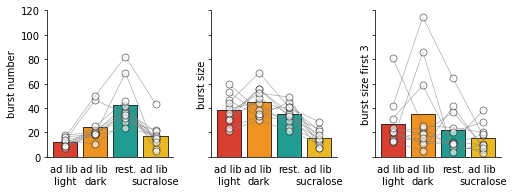

In [14]:
f,ax=plt.subplots(figsize=(9, 3), ncols=3, sharey=True, gridspec_kw={"bottom": 0.2, "left":0.2})
plt.subplots_adjust(wspace=0.3)

tp.barscatter([adlib_light_means["burst number"], adlib_dark_means["burst number"], 
               restricted_dark_means["burst number"], adlib_sucralose_means["burst number"]],
              paired=True,
              barfacecolor_option='individual',
              barfacecolor=colors,
              scattersize=70,
              grouplabel= ["ad lib \nlight", "ad lib \ndark", "rest.", "ad lib \nsucralose"],
              scatteralpha=0.6,
              ax=ax[0])

tp.barscatter([adlib_light_means["burst size"], adlib_dark_means["burst size"], 
               restricted_dark_means["burst size"], adlib_sucralose_means["burst size"]],
              paired=True,
              barfacecolor_option='individual',
              barfacecolor=colors,
              scattersize=70,
              grouplabel= ["ad lib \nlight", "ad lib \ndark", "rest.", "ad lib \nsucralose"],
              scatteralpha=0.6,
              ax=ax[1])

tp.barscatter([adlib_light_means["burst size first 3"],adlib_dark_means["burst size first 3"], 
               restricted_dark_means["burst size first 3"], adlib_sucralose_means["burst size first 3"]],
              paired=True,
              barfacecolor_option='individual',
              barfacecolor=colors,
              scattersize=70,
              grouplabel= ["ad lib \nlight", "ad lib \ndark", "rest.", "ad lib \nsucralose"],
              scatteralpha=0.6,
              ax=ax[2])

ax[0].set_ylabel("burst number")
ax[1].set_ylabel("burst size")
ax[2].set_ylabel("burst size first 3")

f.savefig("C:\\Users\\kvo019\\OneDrive - UiT Office 365\\Pipette 2\\People\\Linnea\\Manuscripts\\hislight paper\\figures\\microstructure.pdf")

In [15]:
def get_runs(onset, min_run_length=3, run_threshold=10):

    current_list = []
    runs = []
    
    for i in range(1, len(onset)):
        time_diff = (onset[i] - onset[i - 1])
        if time_diff <= run_threshold:
            current_list.append(onset[i])
        else:
            current_list = [onset[i]]
            runs.append(current_list)
            
    no_short_runs = []
    
    for run in runs:
        if len(run)>min_run_length-1:
            no_short_runs.append(run)
     
    time_zeroed_runs = []
    
    for run in no_short_runs:
        time_zeroed_runs.append([t-run[0] for t in run])

    return time_zeroed_runs


def get_runs_from_all (data, mice):
    #print(data)

    temp_runs = []
    
    for mouse in mice:
        for key, val in data.items():
            #print(val)
            onset = val["licks"]
            temp_runs.append(get_runs(onset))

    all_runs = []
    for session in temp_runs:
        for run in session:
            all_runs.append(run)
            
    return all_runs

In [16]:
adlib_light_runs = get_runs_from_all(adlib_light, mice)
adlib_dark_runs = get_runs_from_all(adlib_dark, mice)
restricted_runs = get_runs_from_all(restricted_dark, mice)
adlib_sucralose_runs = get_runs_from_all(adlib_sucralose, mice)

In [17]:
bins= np.arange(-5,40,1)

adlib_light_hist = np.histogram(tp.flatten_list(adlib_light_runs), bins= bins)
adlib_dark_hist = np.histogram(tp.flatten_list(adlib_dark_runs), bins= bins)
restricted_hist = np.histogram(tp.flatten_list(restricted_runs), bins= bins)
adlib_sucralose_hist = np.histogram(tp.flatten_list(adlib_sucralose_runs), bins= bins)

In [18]:
def sort_runs(runs):
    sort_order = np.argsort([x[-1]for x in runs])
    runs_sorted = [runs[i] for i in sort_order]
    
    return runs_sorted 

def make_data_for_lick_raster(runs):
    data= tp.flatten_list(runs)
    ymin= []
    ymax= []
    for idx,run in enumerate(runs):
        ymin.append([idx]*len(run))
    
    ymin=np.array(tp.flatten_list(ymin))
    ymax=ymin+0.9

    return data, ymin, ymax

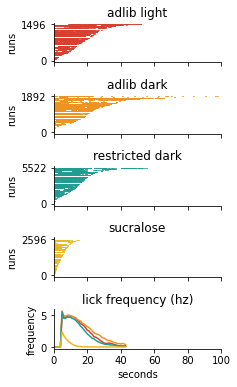

In [20]:
f,ax = plt.subplots(figsize=(3, 6),nrows=5, sharex = True)
plt.subplots_adjust(hspace=0.8)

adlib_light_sorted_runs = sort_runs(adlib_light_runs)
adlib_dark_sorted_runs = sort_runs(adlib_dark_runs)
restricted_sorted_runs = sort_runs(restricted_runs)
sucralose_sorted_runs = sort_runs(adlib_sucralose_runs)


data_adlib_light, ymin_adlib_light, ymax_adlib_light =make_data_for_lick_raster(adlib_light_sorted_runs)
data_adlib_dark, ymin_adlib_dark, ymax_adlib_dark =make_data_for_lick_raster(adlib_dark_sorted_runs)
data_restricted, ymin_restricted, ymax_restricted =make_data_for_lick_raster(restricted_sorted_runs)
data_sucralose, ymin_sucralose, ymax_sucralose =make_data_for_lick_raster(sucralose_sorted_runs)

ax[0].vlines(data_adlib_light, ymin_adlib_light, ymax_adlib_light, color= "#D83F31")
ax[1].vlines(data_adlib_dark, ymin_adlib_dark, ymax_adlib_dark, color= "#EE9322")    
ax[2].vlines(data_restricted, ymin_restricted, ymax_restricted, color= "#219C90")
ax[3].vlines(data_sucralose, ymin_sucralose, ymax_sucralose, color= "#E9B824")

ax[4].plot(adlib_light_hist[0]/len(adlib_light_sorted_runs), color= "#D83F31")
ax[4].plot(adlib_dark_hist[0]/len(adlib_dark_sorted_runs), color="#EE9322")
ax[4].plot(restricted_hist[0]/len(restricted_sorted_runs), color="#219C90")
ax[4].plot(adlib_sucralose_hist[0]/len(restricted_sorted_runs), color="#E9B824")

ax[0].set_title("adlib light")
ax[1].set_title("adlib dark")
ax[2].set_title("restricted dark")
ax[3].set_title("sucralose")
ax[4].set_title("lick frequency (hz)")

ax[0].set_ylabel("runs")
ax[1].set_ylabel("runs")
ax[2].set_ylabel("runs")
ax[3].set_ylabel("runs")
ax[4].set_ylabel("frequency")

ax[4].set_xlabel("seconds")


ax[0].set_yticks([0, len(adlib_light_sorted_runs)])
ax[1].set_yticks([0,len(adlib_dark_sorted_runs)])
ax[2].set_yticks([0,len(restricted_sorted_runs)])
ax[3].set_yticks([0,len(sucralose_sorted_runs)])

ax[0].set_xlim(0,100)

for ax in [ax[0],ax[1], ax[2], ax[3], ax[4]]:
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

f.savefig("C:\\Users\\kvo019\\OneDrive - UiT Office 365\\Pipette 2\\People\\Linnea\\Manuscripts\\hislight paper\\figures\\lick_rate.pdf")

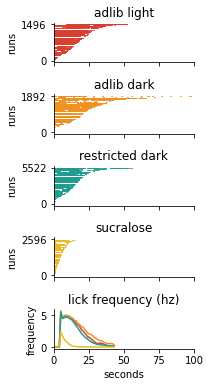

In [28]:

def sort_runs(runs):
    sort_order = np.argsort([x[-1]for x in runs])
    runs_sorted = [runs[i] for i in sort_order]
    
    return runs_sorted 

f,ax = plt.subplots(figsize=(3, 6),nrows=5, sharex = True,
                    gridspec_kw={"hspace":0.8, "left":0.25})


adlib_light_sorted_runs = sort_runs(adlib_light_runs)
adlib_dark_sorted_runs = sort_runs(adlib_dark_runs)
restricted_sorted_runs = sort_runs(restricted_runs)
adlib_sucralose_sorted_runs = sort_runs(adlib_sucralose_runs)

for idx, run in enumerate(adlib_light_sorted_runs):
    ax[0].vlines(run, idx, idx+0.9, color= "#D83F31")
    
for idx, run in enumerate(adlib_dark_sorted_runs):
    ax[1].vlines(run, idx, idx+0.9, color="#EE9322")
    
for idx, run in enumerate(restricted_sorted_runs):
    ax[2].vlines(run, idx, idx+0.9, color="#219C90")
    
for idx, run in enumerate(adlib_sucralose_sorted_runs):
    ax[3].vlines(run, idx, idx+0.9, color="#E9B824")
    
ax[4].plot(adlib_light_hist[0]/len(adlib_light_sorted_runs), color= "#D83F31")
ax[4].plot(adlib_dark_hist[0]/len(adlib_dark_sorted_runs), color="#EE9322")
ax[4].plot(restricted_hist[0]/len(restricted_sorted_runs), color="#219C90")
ax[4].plot(adlib_sucralose_hist[0]/len(restricted_sorted_runs), color="#E9B824")

ax[0].set_title("adlib light")
ax[1].set_title("adlib dark")
ax[2].set_title("restricted dark")
ax[3].set_title("sucralose")
ax[4].set_title("lick frequency (hz)")

ax[0].set_ylabel("runs")
ax[1].set_ylabel("runs")
ax[2].set_ylabel("runs")
ax[3].set_ylabel("runs")
ax[4].set_ylabel("frequency")

ax[4].set_xlabel("seconds")
    
ax[0].set_yticks([0, len(adlib_light_sorted_runs)])
ax[1].set_yticks([0,len(adlib_dark_sorted_runs)])
ax[2].set_yticks([0,len(restricted_sorted_runs)])
ax[3].set_yticks([0,len(sucralose_sorted_runs)])

ax[0].set_xlim(0,100)

for ax in [ax[0], ax[1], ax[2], ax[3], ax[4]]:
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

f.savefig("C:\\Users\\kvo019\\OneDrive - UiT Office 365\\Pipette 2\\People\\Linnea\\Manuscripts\\hislight paper\\figures\\lick_rate.pdf")

In [14]:
adlib_light_sorted_runs = sort_runs(adlib_light_runs)

In [13]:
def sort_runs(runs):
    sort_order = np.argsort([x[-1]for x in runs])
    runs_sorted = [runs[i] for i in sort_order]
    
    return runs_sorted 

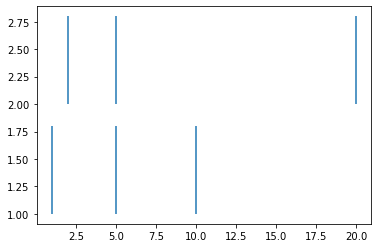

In [18]:
f, ax=plt.subplots()
data= [1,5,10,2,5,20]
ymin=[1,1,1,2,2,2]
ymax=[1.8, 1.8, 1.8, 2.8, 2.8, 2.8]
ax.vlines(data, ymin, ymax)


In [43]:
def make_data_for_lick_raster(runs):
    data= tp.flatten_list(runs)
    ymin= []
    ymax= []
    for idx,run in enumerate(runs):
        ymin.append([idx]*len(run))
    
    ymin=np.array(tp.flatten_list(ymin))
    ymax=ymin+0.9

    return data, ymin, ymax

data, ymin, ymax =make_data_for_lick_raster(adlib_light_runs)

In [44]:
ymin

array([   0,    0,    0, ..., 1495, 1495, 1495])

In [45]:
ymax

array([9.0000e-01, 9.0000e-01, 9.0000e-01, ..., 1.4959e+03, 1.4959e+03,
       1.4959e+03])

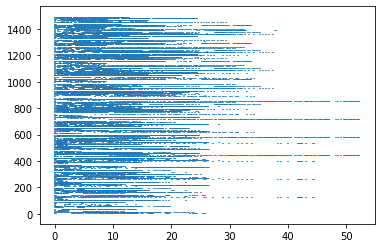

In [46]:
f, ax=plt.subplots()
ax.vlines(data, ymin, ymax)